# EXP 1 - Setting up the Python environment and libraries

In [15]:
import pandas as pd
import numpy as np
from ipywidgets import interact
from google.colab import drive

data = np.arange(10)
print(data)

df = pd.DataFrame({
    "A": np.random.randint(0, 100, 10),
    "B": np.random.random(10)
})
print(df)

def square(x):
    return x * x

interact(square, x=(0, 10, 1))

[0 1 2 3 4 5 6 7 8 9]
    A         B
0  23  0.196367
1  66  0.436704
2  88  0.023361
3  53  0.863922
4  96  0.697233
5  74  0.336121
6  12  0.785018
7  36  0.739552
8  20  0.064096
9  80  0.034176


interactive(children=(IntSlider(value=5, description='x', max=10), Output()), _dom_classes=('widget-interact',…

<function __main__.square(x)>

#EXP 2 - EDA-Data Import and Export

In [13]:
import pandas as pd
from sqlalchemy import create_engine

df_csv = pd.read_csv("employee_dataset.csv")
df_excel = pd.read_excel("employee_dataset.xlsx")

engine = create_engine("sqlite:///:memory:")
df_csv.to_sql("employees", engine, index=False)
df_sql = pd.read_sql("SELECT * FROM employees WHERE Salary > 60000", engine)

url = "https://people.sc.fsu.edu/~jburkardt/data/csv/airtravel.csv"
df_web = pd.read_csv(url)

df_csv.to_excel("employee_dataset_export.xlsx", index=False)


# EXP 3 - EDA-Data Cleaning

In [8]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler

df = pd.read_csv("sample_dirty_dataset.csv")

df['Age']      = df['Age'].fillna(df['Age'].mean())
df['City']     = df['City'].fillna('Unknown')
df['Income']   = df['Income'].fillna(df['Income'].median())
df['Spending'] = df['Spending'].fillna(df['Spending'].median())
df['Category'] = df['Category'].fillna('Unknown')

df.dropna(axis=1, how='all', inplace=True)
df.drop_duplicates(inplace=True)
df.drop(columns=['Name'], inplace=True)

df['SignupDate'] = pd.to_datetime(df['SignupDate'], errors='coerce')
df['Income']     = pd.to_numeric(df['Income'], errors='coerce')
df['Spending']   = pd.to_numeric(df['Spending'], errors='coerce')
df['Category']   = df['Category'].astype('category')

minmax = MinMaxScaler()
df[['Income_minmax', 'Spending_minmax']] = minmax.fit_transform(df[['Income','Spending']])

standard = StandardScaler()
df[['Income_std', 'Spending_std']] = standard.fit_transform(df[['Income','Spending']])

print(df.head())


   CustomerID     Age         City SignupDate   Income  Spending Category  \
0           1  25.000     New York 2023-01-10  50000.0    2000.0        A   
1           2  31.625  Los Angeles 2023-02-15  60000.0    2500.0        B   
2           3  35.000      Chicago        NaT  59000.0    3000.0        B   
3           4  40.000      Unknown 2023-04-20  75000.0    4000.0        C   
5           5  29.000      Seattle 2023-06-01  48000.0    2200.0        A   

   Income_minmax  Spending_minmax  Income_std  Spending_std  
0       0.074074         0.090909   -1.069045     -1.122980  
1       0.444444         0.318182    0.267261     -0.333385  
2       0.407407         0.545455    0.133631      0.456211  
3       1.000000         1.000000    2.271721      2.035401  
5       0.000000         0.181818   -1.336306     -0.807142  


# EXP 4 - EDA-Data Inspection and Analysis

In [9]:
import pandas as pd

df = pd.read_csv("sample_dirty_dataset.csv")

print(df.head())
print(df.tail())
print(df.info())
print(df.describe())
print(df.describe(include='object'))
print(df['City'].value_counts())

high_income = df[df['Income'] > 60000]
category_a  = df[df['Category'] == 'A']
subset_cols = df.loc[df['Spending'] > 2500,
                     ['CustomerID','City','Spending']]

mean_age   = df['Age'].mean()
median_age = df['Age'].median()
mode_age   = df['Age'].mode().iloc[0]

range_age  = df['Age'].max() - df['Age'].min()
var_income = df['Income'].var()
std_income = df['Income'].std()

print("Mean age:", mean_age)
print("Median age:", median_age)
print("Mode age:", mode_age)
print("Age range:", range_age)
print("Income variance:", var_income)
print("Income standard deviation:", std_income)


   CustomerID     Name   Age         City    SignupDate   Income  Spending  \
0           1    Alice  25.0     New York    2023-01-10  50000.0    2000.0   
1           2      Bob   NaN  Los Angeles    2023-02-15  60000.0    2500.0   
2           3  Charlie  35.0      Chicago  invalid_date      NaN    3000.0   
3           4    David  40.0          NaN    2023-04-20  75000.0    4000.0   
4           4    David  40.0          NaN    2023-04-20  75000.0    4000.0   

  Category  
0        A  
1        B  
2        B  
3        C  
4        C  
   CustomerID   Name   Age     City  SignupDate   Income  Spending Category
5           5    Eve  29.0  Seattle  2023-06-01  48000.0    2200.0        A
6           6    NaN  22.0    Miami  2023-07-11  52000.0    1800.0        A
7           7  Grace   NaN   Boston  2023-08-05  58000.0       NaN        B
8           8  Heidi  34.0  Chicago  2023-09-09      NaN    3100.0        A
9           9   Ivan  28.0   Denver  2023-10-12  61000.0    2900.0      N

#EXP 5 - EDA-Data Visualization with Matplotlib

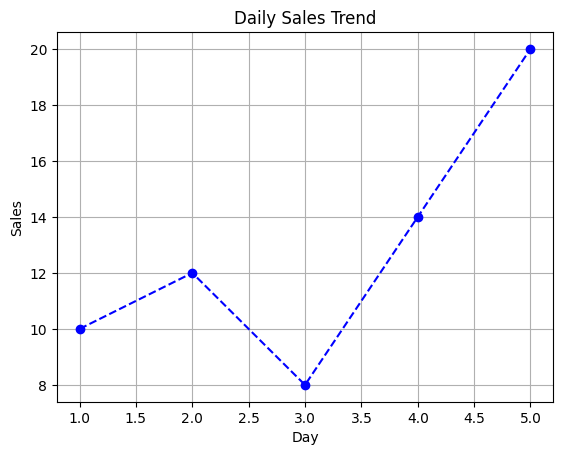

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

#Line Chart
days = [1, 2, 3, 4, 5]
sales = [10, 12, 8, 14, 20]
plt.plot(days, sales, color='blue', marker='o', linestyle='--')
plt.title('Daily Sales Trend')
plt.xlabel('Day')
plt.ylabel('Sales')
plt.grid(True)
plt.show()

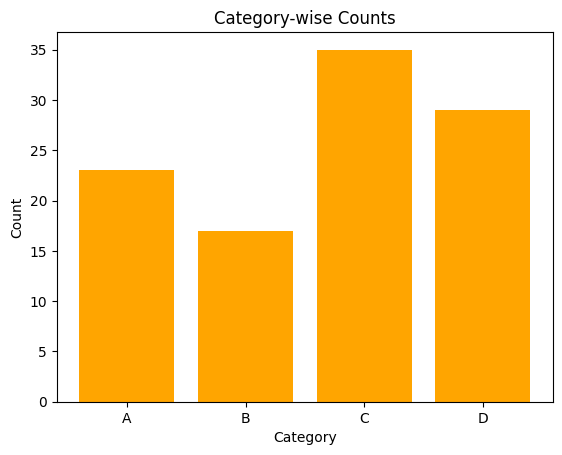

In [ ]:
#Bar chart
categories = ['A', 'B', 'C', 'D']
values = [23, 17, 35, 29]
plt.bar(categories, values, color='orange')
plt.title('Category-wise Counts')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()

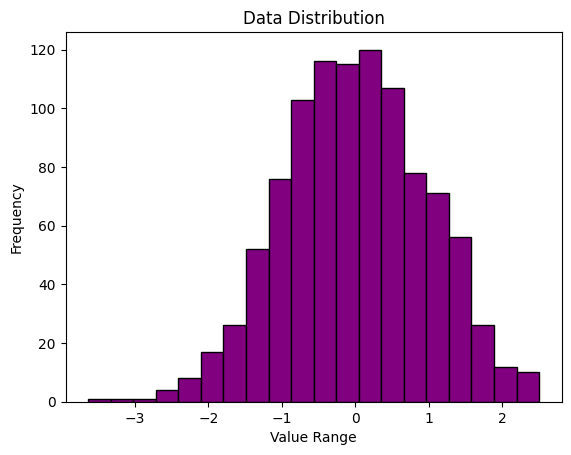

In [ ]:
#Histogram
data = np.random.randn(1000)
plt.hist(data, bins=20, color='purple', edgecolor='black')
plt.title('Data Distribution')
plt.xlabel('Value Range')
plt.ylabel('Frequency')
plt.show()